# Model for predicting USU Men's Basketball Outcome

### Steps:
1. Data Analysis
2. Data Visualization
3. Data Splitting
4. Models
5. Tuning
6. Evaluation

## Imports

In [42]:


# Data Handling and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

# Model Evaluation and Optimization
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate, validation_curve, RandomizedSearchCV
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import reciprocal, randint

# Pipeline Construction
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

### Load Data

In [43]:
dataset_df = pd.read_csv('data/combined_merged_stats.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (571, 93)


## Data Exploration

In [44]:
dataset_df.head()

,rank,team,conf,record,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,...,USU_ConPA,USU_ConPoss,USU_ConOE,USU_ConDE,USU_ConSOSRemain,USU_Conf Win%,USU_WAB,USU_WAB Rk,"USU_Fun Rk, adjt",USU_ new
0,202,Idaho,WAC,11-18,109.635748,57,112.924009,332,0.415847,202,...,1120.0,1123.0875,1.064031,0.997251,0.0,0.611111,-3.998123,103,56,60.397674
1,209,Mount St. Mary's,NEC,18-14,102.351783,168,105.883279,249,0.403694,209,...,1120.0,1123.0875,1.064031,0.997251,0.0,0.611111,-3.998123,103,56,60.397674
2,309,Texas A&M Corpus Chris,Slnd,5-23,96.127881,278,110.899246,315,0.161943,309,...,1120.0,1123.0875,1.064031,0.997251,0.0,0.611111,-3.998123,103,56,60.397674
3,76,Weber St.,BSky,28-7,108.777978,66,98.686302,111,0.753928,76,...,1120.0,1123.0875,1.064031,0.997251,0.0,0.611111,-3.998123,103,56,60.397674
4,72,Santa Clara,WCC,24-12,110.103495,52,99.533938,125,0.761442,72,...,1120.0,1123.0875,1.064031,0.997251,0.0,0.611111,-3.998123,103,56,60.397674


In [45]:
dataset_df.describe()

,rank,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,proj. W,Proj. L,Pro Con W,...,USU_ConPA,USU_ConPoss,USU_ConOE,USU_ConDE,USU_ConSOSRemain,USU_Conf Win%,USU_WAB,USU_WAB Rk,"USU_Fun Rk, adjt",USU_ new
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,150.670753,104.722576,154.623468,102.261803,154.469352,0.553957,150.670753,16.751473,14.751154,8.537813,...,1136.073555,1125.901116,1.097243,1.009672,0.027836,0.652807,-2.461169,93.507881,171.208406,64.882286
std,85.184033,6.409625,91.260472,5.106763,88.406678,0.217348,85.184033,6.355820,4.827281,3.863393,...,134.876193,119.363431,0.043060,0.063836,0.118311,0.180647,4.437154,60.269813,107.824144,3.127863
min,2.000000,88.133201,3.000000,87.901683,2.000000,0.050090,2.000000,0.000000,3.000000,0.000000,...,897.000000,863.687500,1.046889,0.867503,0.000000,0.388889,-9.079792,18.000000,4.000000,60.200854
25%,81.500000,100.496338,83.000000,98.740017,83.000000,0.385169,81.500000,12.000000,11.000000,6.000000,...,1089.000000,1039.825000,1.063375,0.979429,0.000000,0.444444,-5.904897,33.000000,87.000000,61.886602
50%,142.000000,105.350864,139.000000,102.217850,138.000000,0.554772,142.000000,17.000000,15.000000,9.000000,...,1152.000000,1129.850000,1.078354,1.012309,0.000000,0.666667,-3.998123,103.000000,140.000000,66.691198
75%,215.500000,108.916089,229.500000,105.927516,220.000000,0.735669,215.500000,21.000000,18.000000,12.000000,...,1228.000000,1225.425000,1.125189,1.058844,0.000000,0.789474,2.245948,138.000000,268.000000,67.475889
max,351.000000,121.923826,350.000000,116.115624,351.000000,0.966030,351.000000,35.000000,28.000000,18.000000,...,1347.000000,1327.950000,1.182699,1.099210,0.529813,0.937500,3.829966,191.000000,355.000000,69.008667


In [46]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  571 non-null    int64  
 1   team                  571 non-null    object 
 2   conf                  571 non-null    object 
 3   record                571 non-null    object 
 4   adjoe                 571 non-null    float64
 5   oe Rank               571 non-null    int64  
 6   adjde                 571 non-null    float64
 7   de Rank               571 non-null    int64  
 8   barthag               571 non-null    float64
 9   rank.1                571 non-null    int64  
 10  proj. W               571 non-null    float64
 11  Proj. L               571 non-null    float64
 12  Pro Con W             571 non-null    float64
 13  Pro Con L             571 non-null    float64
 14  Con Rec.              571 non-null    object 
 15  sos                   5

***Check for null values***

In [47]:
dataset_df.isnull().sum().sort_values(ascending=False)

Win/Loss                7
USU_Proj. L             0
USU_Proj. Con SOS       0
USU_Proj. Noncon SOS    0
USU_Proj. SOS           0
                       ..
Qual O                  0
Con Adj DE              0
Con Adj OE              0
Opp Proj DE             0
USU_ new                0
Length: 93, dtype: int64

## Data Visualization

<Axes: >

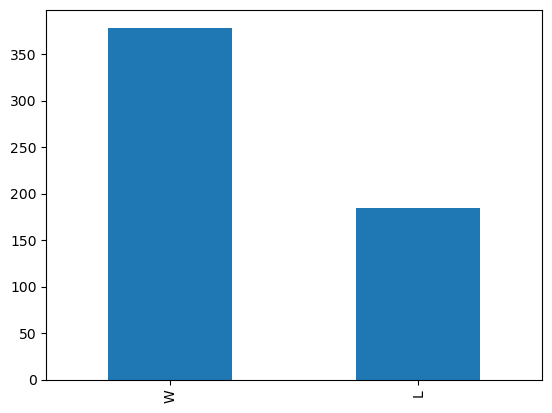

In [48]:
plot_df = dataset_df['Win/Loss'].value_counts()
plot_df.plot(kind='bar')

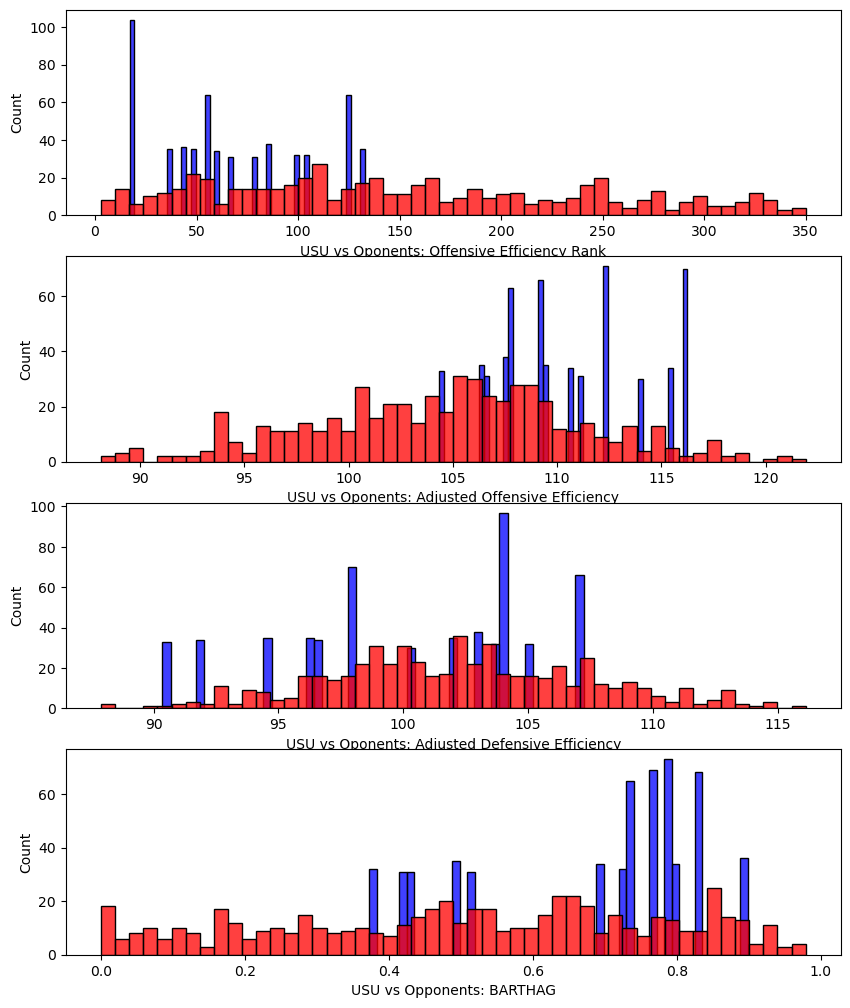

In [51]:
fig, ax = plt.subplots(4, 1, figsize=(10, 5))  # Adjusted to 3x1 grid
plt.subplots_adjust(top=2)

# Plotting and setting x-axis labels
sns.histplot(dataset_df['USU_oe Rank'], color='b', bins=50, ax=ax[0])
ax[0].set_xlabel('USU vs Oponents: Offensive Efficiency Rank')

sns.histplot(dataset_df['USU_adjoe'], color='b', bins=50, ax=ax[1])
ax[1].set_xlabel('USU vs Oponents: Adjusted Offensive Efficiency')

sns.histplot(dataset_df['USU_adjde'], color='b', bins=50, ax=ax[2])
ax[2].set_xlabel('USU vs Oponents: Adjusted Defensive Efficiency')

sns.histplot(dataset_df['USU_Qual Barthag'], color='b', bins=50, ax=ax[3])
ax[3].set_xlabel('USU vs Opponents: BARTHAG')
# Overlaying plots on the same axes
sns.histplot(dataset_df['oe Rank'], color='r', bins=50, ax=ax[0])
sns.histplot(dataset_df['adjoe'], color='r', bins=50, ax=ax[1])
sns.histplot(dataset_df['adjde'], color='r', bins=50, ax=ax[2])
sns.histplot(dataset_df['Qual Barthag'], color='r', bins=50, ax=ax[3])

plt.show()




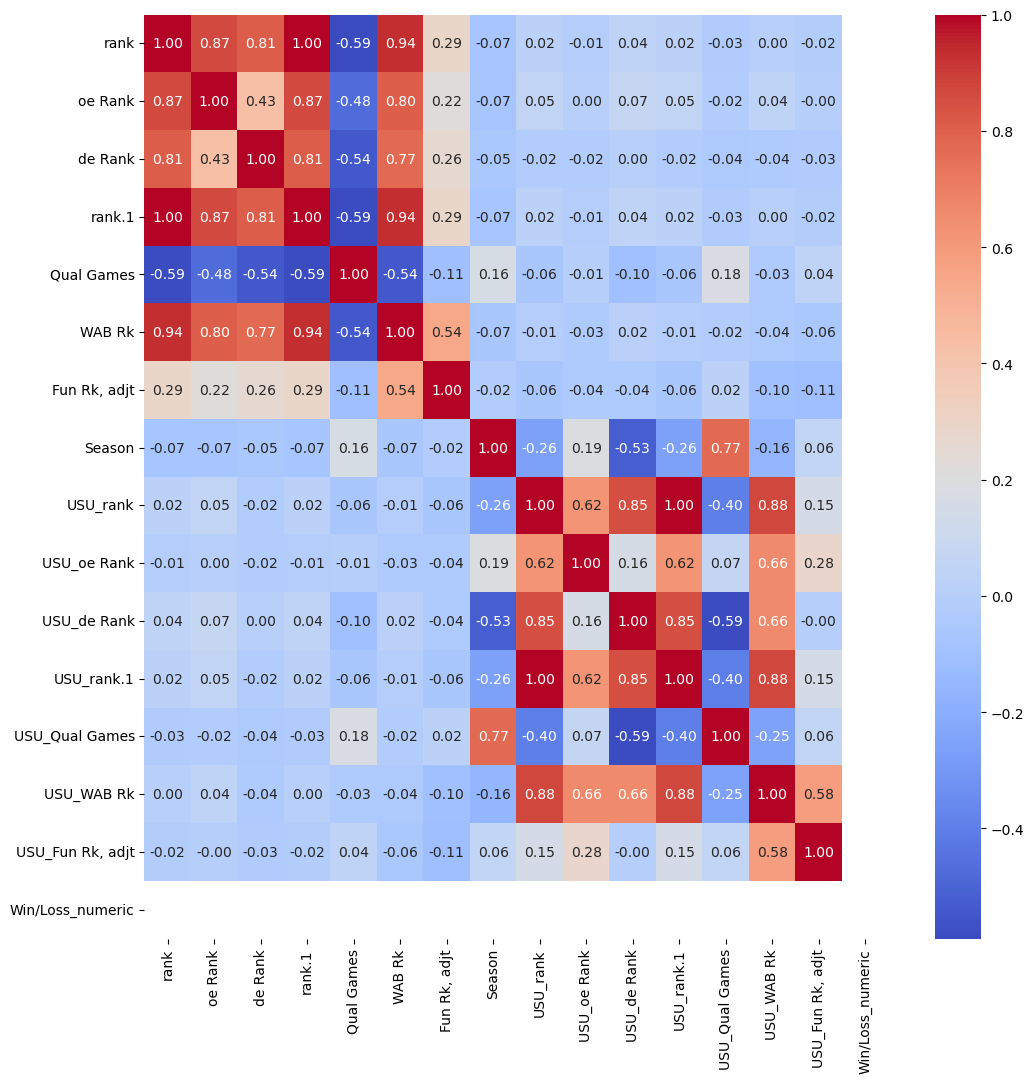

In [57]:
numeric_features = dataset_df.select_dtypes(include=[int]).columns.tolist()

# Convert 'Win/Loss' to numeric (1 for Win, 0 for Loss)

# Add 'Win/Loss_numeric' to the list of numeric features
numeric_features.append('Win/Loss_numeric')

# Create a new DataFrame with only the numeric features and 'Win/Loss_numeric'
df_numeric = dataset_df[numeric_features]

# Create a correlation matrix that includes 'Win/Loss_numeric'
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [ ]:
float_features = ['adjoe', 'adjde', 'barthag' '']

# Convert 'Win/Loss' to numeric (1 for Win, 0 for Loss)

# Add 'Win/Loss_numeric' to the list of numeric features
numeric_features.append('Win/Loss_numeric')

# Create a new DataFrame with only the numeric features and 'Win/Loss_numeric'
df_numeric = dataset_df[numeric_features]

# Create a correlation matrix that includes 'Win/Loss_numeric'
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
